<center><img src="images/logo.png" alt="drawing" width="400" style="background-color:white; padding:1em;" /></center> <br/>

# ML through Application
## Module 2, Lab 2: Performing EDA for Numerical Variables

Exploratory data analysis (EDA) is an important process in ML. To learn about EDA, you will perform initial data investigations to discover patterns, spot anomalies, and look for insights to inform later ML modeling choices.

You will learn how to do the following:

- Understand standard statistics that are used in ML for numerical data.
- Create basic plots of numerical features.

----

__Austin Animal Center Dataset__

In this lab, you will work with historical pet adoption data in the [Austin Animal Center Shelter Intakes and Outcomes dataset](https://www.kaggle.com/datasets/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes?resource=download). The target field of the dataset (**Outcome Type**) is the outcome of adoption: 1 for adopted and 0 for not adopted. Multiple features are used in the dataset.

Dataset schema:
- __Pet ID:__ Unique ID of the pet
- __Outcome Type:__ State of pet at the time of recording the outcome (0 = not placed, 1 = placed). This is the field to predict.
- __Sex upon Outcome:__ Sex of pet at outcome
- __Name:__ Name of pet 
- __Found Location:__ Found location of pet before it entered the shelter
- __Intake Type:__ Circumstances that brought the pet to the shelter
- __Intake Condition:__ Health condition of the pet when it entered the shelter
- __Pet Type:__ Type of pet
- __Sex upon Intake:__ Sex of pet when it entered the shelter
- __Breed:__ Breed of pet 
- __Color:__ Color of pet 
- __Age upon Intake Days:__ Age (days) of pet when it entered the shelter
- __Age upon Outcome Days:__ Age (days) of pet at outcome

---

You will be presented with two kinds of exercises throughout the notebook: activities and challenges. <br/>

| <img style="float: center;" src="images/activity.png" alt="Activity" width="125"/>| <img style="float: center;" src="images/challenge.png" alt="Challenge" width="125"/>|
| --- | --- |
|<p style="text-align:center;">No coding is needed for an activity. You try to understand a concept, <br/>answer questions, or run a code cell.</p> |<p style="text-align:center;">Challenges are where you can practice your coding skills.</p>

## Index

- [Overall statistics](#Overall-statistics)
- [Basic plots](#Basic-plots)

---
## Overall statistics

In this section, you will look at simple statistics of the dataset, with a focus on the numerical variables.

First, read the dataset into a DataFrame and look at the data.

In [1]:
%%capture
# Install libraries
!pip install -U -q -r requirements.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from sklearn.impute import SimpleImputer

In [3]:
# Import the dataset
df = pd.read_csv("data/review_dataset.csv")

# Print the dataset shape (rows/columns)
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (95485, 13)


The output tells you that the dataset has 95485 rows and 13 columns. 

You can use the `info()` function to get more simple statistics about the dataset.

In [4]:
# See the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB


Numerical features have statistics such as count, mean, standard deviation, minimum, and maximum.

You can use the `describe()` function to display these statistics for the numerical features in the dataset.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, use the <code>df.describe()</code> function to get a summary of statistics for the numerical columns.</p>
    <br>
</div>

In [5]:
############### CODE HERE ###############

# Get summary statistics for numerical columns
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)

############## END OF CODE ##############

       Outcome Type  Age upon Intake Days  Age upon Outcome Days
count  95485.000000          95485.000000           95485.000000
mean       0.564005            703.436959             717.757313
std        0.495889           1052.252197            1055.023160
min        0.000000              0.000000               0.000000
25%        0.000000             30.000000              60.000000
50%        1.000000            365.000000             365.000000
75%        1.000000            730.000000             730.000000
max        1.000000           9125.000000            9125.000000


Next, print the names of the columns (features) so that you can choose which features are numerical.

In [6]:
print(df.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')


The numerical features are:
- Age upon Intake Days
- Age upon Outcome Days

You will use only these two features for the remainder of this lab.

In [7]:
# Make a list of the features that you want to use and
# set a variable that contains the name of the target feature
numerical_features = ["Age upon Intake Days", "Age upon Outcome Days"]

model_target = "Outcome Type"

---
## Basic plots

Now, you will examine the data by using plots.

### Histogram plots

Histograms show the distribution of numeric data. Data is divided into buckets or bins.

You can use the `plot.hist()` function to make a histogram plot for a specific feature.

__Note:__ These plots ignore null (missing) values. You will learn how to deal with missing values in the next section.

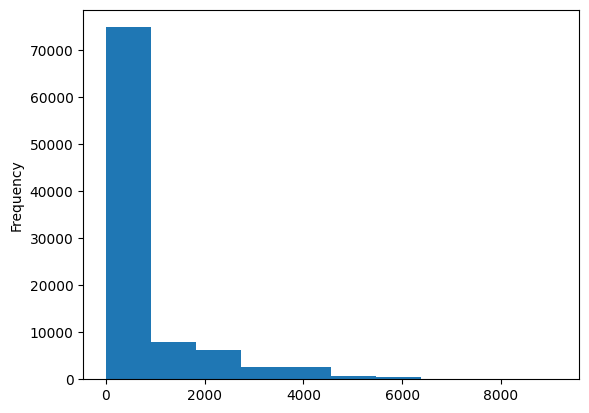

In [8]:
# Create a histogram plot of the Age upon Intake Days feature
df["Age upon Intake Days"].plot.hist();

Notice that the number of bins that data is grouped into was picked for you. You can use the `bins=##` parameter to specify how many bins you want displayed.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">Complete the code in the following code cell to create a histogram plot with five bins for each numerical feature.</p><br>
    <p style=" text-align: center; margin: auto;">After plotting the data, you can change the <code>bins=</code> parameter to see how this changes the output.</p>
    <br>
</div>

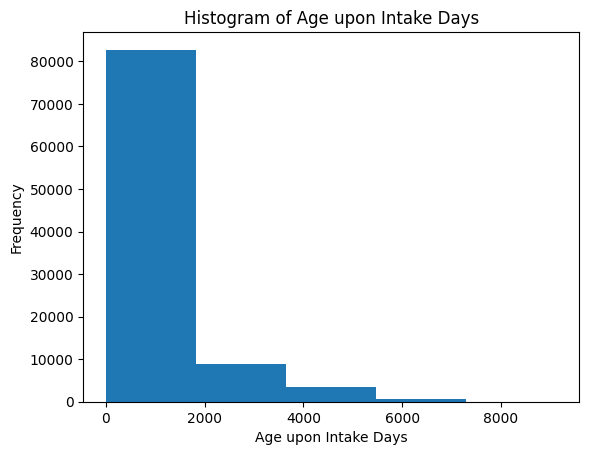

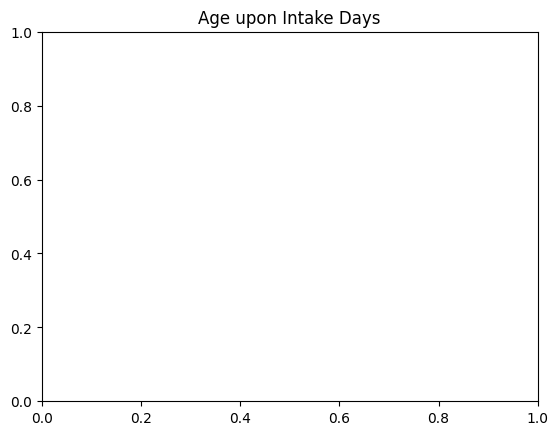

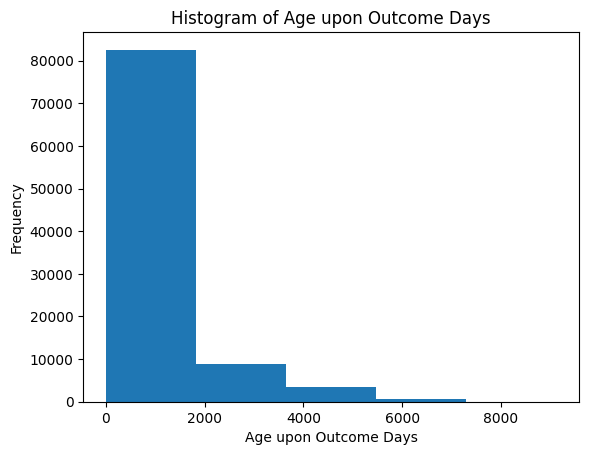

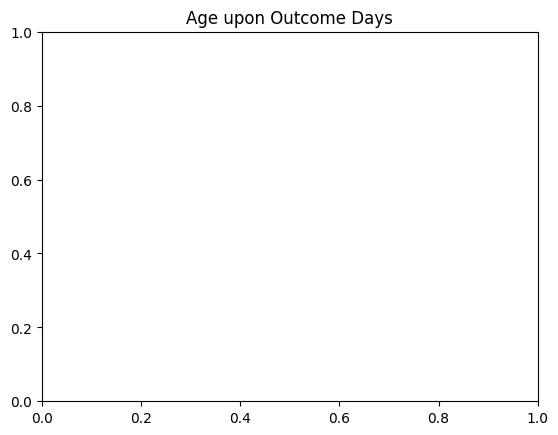

In [13]:
# Loop through each numerical feature
for c in numerical_features:
############### CODE HERE ###############
# Check for missing values and non-numeric data
    if df[c].dtype != object and not df[c].isnull().any():
        # Create a histogram plot with five bins
        plt.hist(df[c], bins=5)
        
        # Set plot title and labels
        plt.title(f'Histogram of {c}')
        plt.xlabel(c)
        plt.ylabel('Frequency')
        
        # Display the plot
        plt.show()
    else:
        print(f"Skipping {c} because it contains non-numeric or missing values.")


############## END OF CODE ##############
    # Set the title of the plot to the name of the feature that you plotted
    plt.title(c)
    plt.show()

If you notice that values are heavily placed in the first bin, it's a good idea to check for outliers. You can look at the min and max values of the particular feature or explore value ranges.

In [14]:
# Print the max and min values for each feature
for c in numerical_features:
    print(c)
    print("min:", df[c].min(), "max:", df[c].max())

Age upon Intake Days
min: 0 max: 9125
Age upon Outcome Days
min: 0 max: 9125


As with categorical features, you can use the `value_counts()` function to count the number of rows that fall within nonoverlapping ranges. With numerical features, you can specify the number of histogram bins to get a more refined view of the data. 

In [15]:
# Use the value_counts function to put the data into 10 bins
for c in numerical_features:
    print(df[c].value_counts(bins=10, sort=False))

(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: count, dtype: int64
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: count, dtype: int64


In this output, each row has the following format:

(###, ###]  ####

The first set of numbers is the interval range for the bin, and the last number is the count of rows that fall within that range.

__Note:__ The interval range is between a parenthesis and a square bracket. This is interval notation, where the parenthesis indicates that the lower bound cannot include the number and the square bracket indicates that the upper bound includes the number.

---
### Outliers
During EDA, it's important to deal with outliers. If you identify outliers that are likely incorrect values, dropping them could improve the numerical value histograms and later overall model performance.

One method to handle outliers is to calculate the interquartile range (IQR) and drop anything that is 1.5 times smaller or larger than it. To do this, calculate the 25 percent and 75 percent quartiles. Use them to calculate the IQR, and then use the quartile values and the IQR to drop rows from the feature that are outside the range.

<div style="border: 4px solid coral; text-align: center; margin: auto;"><br>
    <p style="text-align:center;margin:auto;">Lower quartile: <code>Q1 = df['feature'].quartile(0.25)</code></p>
    <p style="text-align:center;margin:auto;">Upper quartile: <code>Q3 = $ df['feature'].quartile(0.75)</code></p>
    <p style="text-align:center;margin:auto;">Interquartile range: <code>IQR = Q3 - Q1 </code></p>
    <p style="text-align:center;margin:auto;">Anything not in the range of <code>(Q1 - 1.5 IQR)</code> and <code>(Q3 + 1.5 IQR)</code> is an outlier.</p>
    <br>
</div>

In [16]:
# Uncomment and run this cell to calculate the quartile ranges and remove any values outside the calculated range
for c in numerical_features:
    print("Dropped from feature", c)
    # Calculate the upper and lower quartile values
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    print (Q1 - 1.5*IQR, Q3 + 1.5*IQR)

    # Drop values below Q1 - 1.5 IQR and beyond Q3 + 1.5 IQR
    dropIndexes = df[df[c] > Q3 + 1.5*IQR].index
    df.drop(dropIndexes , inplace=True)
    dropIndexes = df[df[c] < Q1 - 1.5*IQR].index
    df.drop(dropIndexes , inplace=True)
    

Dropped from feature Age upon Intake Days
-1020.0 1780.0
Dropped from feature Age upon Outcome Days
-945.0 1735.0


You should also consider other rules for removing outliers. For example, you could remove any values in the upper 10 percent. 

In [17]:
# Drop values in the upper 10%
for c in numerical_features:
    # Drop values beyond 90% of max()
    dropIndexes = df[df[c] > df[c].max() * 9 / 10].index
    df.drop(dropIndexes, inplace=True)

After you drop the outliers, you can recalculate the `value_counts()` and see how the data has changed.

In [18]:
for c in numerical_features:
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

(-1.0959999999999999, 109.5]    33596
(109.5, 219.0]                   8194
(219.0, 328.5]                   3009
(328.5, 438.0]                  16625
(438.0, 547.5]                      0
(547.5, 657.0]                      0
(657.0, 766.5]                  13408
(766.5, 876.0]                      0
(876.0, 985.5]                      0
(985.5, 1095.0]                  4866
Name: count, dtype: int64
(-1.0959999999999999, 109.5]    31646
(109.5, 219.0]                   9121
(219.0, 328.5]                   3609
(328.5, 438.0]                  16832
(438.0, 547.5]                      0
(547.5, 657.0]                      0
(657.0, 766.5]                  13434
(766.5, 876.0]                      0
(876.0, 985.5]                      0
(985.5, 1095.0]                  5056
Name: count, dtype: int64


You can plot the histograms again to see how they have changed. 

__Note:__ You can change the number of bins for the histograms so you can get a better understanding of the data.

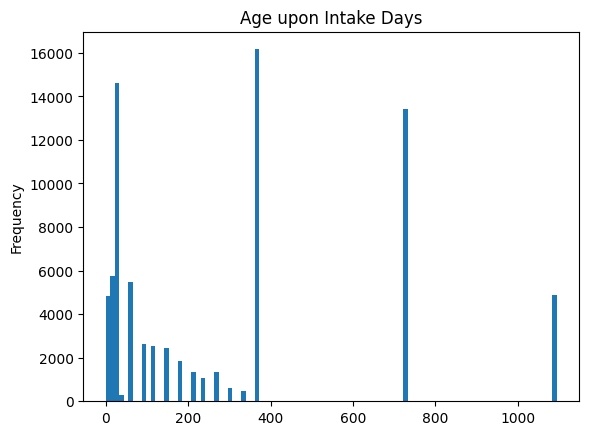

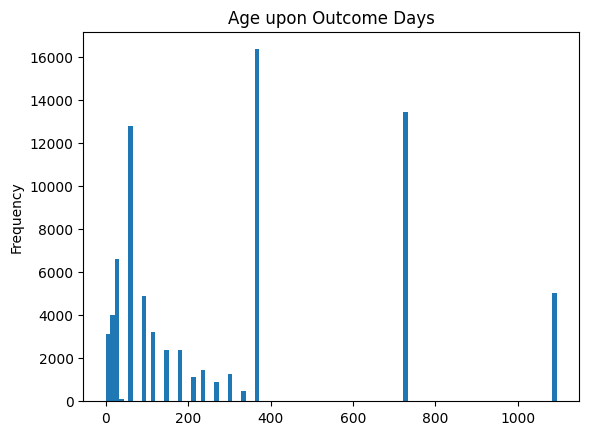

In [19]:
# Plot updated histograms with 100 bins for each numerical feature
for c in numerical_features:
    df[c].plot.hist(bins=100)
    plt.title(c)
    plt.show()

### Scatterplots

Scatterplots are 2D plots of two numerical variables. These plots can be used to examine the relationship between two variables. 

To see a basic scatterplot, you will generate some random data and plot it using `plt.scatter()`. This function requires $x$ and $y$ values to plot.

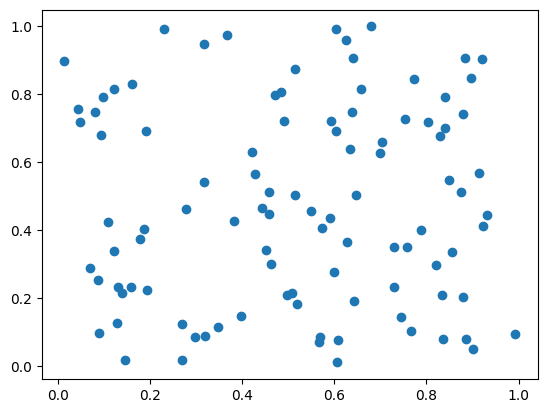

In [20]:
# Generate random data and make a scatterplot of it

# Generate random data
x = np.random.rand(100)
y = np.random.rand(100)

# Plot the data
plt.scatter(x, y)
plt.show()

The `plt.scatter()` function needs two numerical features to successfully plot. You can use this with your dataset to see how features are correlated to each other.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, complete the code to use <code>plt.scatter()</code> to create a scatterplot.</p><br>
    <p style=" text-align: center; margin: auto;"><b>Note:</b> Use <code>df[numerical_features[0]]</code> for the x-axis values and <code>df[numerical_features[1]]</code> for the y-axis values.</p>
    <br>
</div>

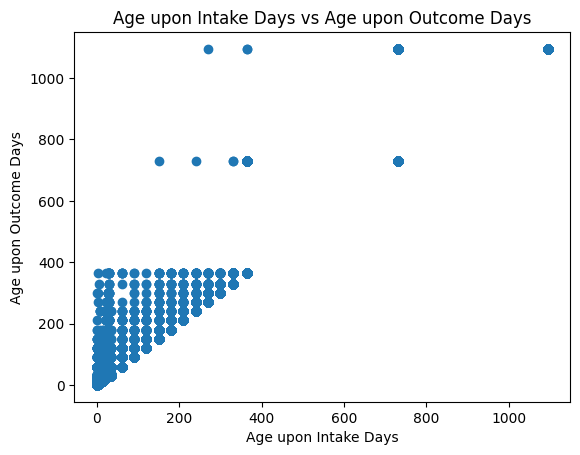

In [21]:
############### CODE HERE ###############

# Create a scatterplot
plt.scatter(df[numerical_features[0]], df[numerical_features[1]])

############## END OF CODE ##############
plt.title(numerical_features[0] + " vs " + numerical_features[1])
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.show()

By looking at this graph, you can start to analyze the data to ensure that it makes sense. The diagonal corresponds to the same age (in days) for the intake and outcome.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [22]:
# Run this cell for a knowledge check question
from MLUMLA_EN_M2_Lab2_quiz_questions import *

question_1

----
## Conclusion

This notebook helped you to understand and manipulate the numerical features in a dataset so that you can create the best ML model. Understanding and preparing data is one of the most important steps to build a successful ML model.

## Next lab

In the next lab, you will learn about transforming raw data into features that an ML algorithm understands better.